# Project 3

## Introduction

This experiment is a regression problem designed to predict the trends of the MasterCard stock market based on data from May 2006 to October 2021.

The dataset chosen was “MasterCard Stock Data,” which was downloaded from Kaggle (https://www.kaggle.com/datasets/kalilurrahman/mastercard-stock-data-latest-and-updated?select=Mastercard_stock_info.csv)

The dataset contains 3,873 data points distributed over the span of 15 years, each with eight unique attributes:

- Date - trading date
- Open Value - value of the stock at its opening time
- High Value - the highest value of the stock on the trading day 
- Low Value  - the lowest value of the stock on the trading day
- Close Value - the value of the stock at the end of the trading day
- Volume of Trades - the amount of times a stock is traded on the trading day
- Dividends Paid - payments a company makes to share profits with its stockholders
- Stock Splits -  a corporate action in which a company increases the number of its outstanding shares by issuing more shares to current shareholders


For preprocesssing of the data, the dividends paid and stock splits were dropped when loading the csv file because they were not necessary when predicting the close value of the stock. The train and test/validation datasets had to be separated so that years A-C are able to predict the stock close value of year D. 

This experiment is designed to predict the close value of the stock from a sequence of the open value, close value, high value, low value, and volume of trades over a preceding series of days.  This class of problem is known as time series.

The hyperparameters tuned for this experiment include the recurrent neural architecture and the number of steps included in the sequence of values used to predict.


## Background

#### What is the Stock Market?

The stock market is the aggregation of buyers and sellers of stocks, which represent ownership claims on businesses. The main purpose of the stock market is for companies to raise money by selling stock to individuals, allowing them in turn to become  investors who profit through this exchange. Through "listing shares for sale on the stock exchanges that make up the stock market, companies get access to the capital they need to operate and expand their businesses without having to take on debt"(Tretina). The stock markets act as primary markets and secondary markets. As a primary market, the stock market allows companies to sell share to the public. Investors can buy and sell the stock they own, creating a secondary market.

The stock market ensures price transparency, liquidity, and price discovery, fair dealings in the economy. It allows all participants to buy and sell stock, keeping transparency while the market keeps tracks of all the purchases and sales. Companies also pay their shareholders dividends when their profit has grown. These exchanges are conducted through formal exchanges known as over-the-counter (OTC) exchanges. The markets operate under the defined rules as stated by the regulator of the stock market. 

Stock prices can fluctuate throughout the day based on trading.  Stocks open in a particular stock market, such as the New York Stock Exchange (NYSE) at an opening price.  As they are traded during the day, they gain or lose value.  They reach a high and low price throughout the day (global maximum and minimum) but may fluctuate up or down and experience one or more local maxima and minima.  At the close of trading for that stock market, the final stock price (or closing price) is noted.

#### Recurrent Neural Networks

"Recurrent networks are designed to learn sequences or time-series data"(Medsker and Jain). They can accomplish this by having backwards connections as well as the typical forward connections. As a datapoint is passed through the RNN, it will proceed to the output layer but the information being sent through the reverse connections will be fed into the net while the next datapoint is passed through the RNN. These backwards connections are useful because the datapoints receive information from the previous datapoints while another datapoint is being fed through the net, essentially creating 'memory' for the neural network. This 'memory' is important for neural networks to learn sequences because now they are able to create predict based on multiple previous inputs.

RNNs are useful for both classification and regression problems. For classifcation, recurrent neural networks are an efficient technique to predict sentiment analysis on text data. This means that the network can predict the feeling or emotions conveyed by some text. For example, they can predict if a review is negative or positive. They can also predict if music lyrics convey feelings of happiness, sadness, excitement, etc. For a regression model, recurrent neural works can predict trends in data based off previous datapoint. An example of this might be predicting trends in the stock market, as is demonstrated in this project. 

#### Long Short Term Memory

As previously mentioned, recurrent neural networks have built-in 'memory' that allows them to remember sequence data. However, this memory is very short-term and often drops off after some number of timesteps, becoming less influential in the model. This can result in lower accuracies with natural language processing, audio analysis/speech recognition, and even trend prediction.

Long Short Term Memory models are "one of the most advanced deep learning architectures for sequence learning tasks, such as handwriting recognition, speech recognition, or time series prediction"(Fischer and Krauss). LTSM processes sequence data using backwards connnections to preserve short-term memory like recurrent units, but they are designed to encode longer-term dependencies than the simpler recurrent units. The general idea is that LSTMs work as memory units that can decide if and when to remember older activations in a way that is connected in a way so the loss function can permitting backpropagation to propagate gradients through the LSTM units. These gradients, if strong enough, will trigger the LSTM units to save longer strands information than general recurrent units. 

#### Predicting Stock Trends with Neural Networks

As neural networks are designed to imitate the human brain, there is a fundamental skill they must develop - the ability to make forecasts based on available historical information. Neural networks are being "used increasingly in a variety of business applications, including forecasting and marketing research. In some areas, such as fraud detection or risk assessment, they are the indisputable leaders"(Vonko). They have several applications in different fields such as financial operations, enterprise planning, trading, business analytics, and product maintenance. Another of these applications include predictions of the stock market.

Shen and Shafiq's "Short-term stock market price trend prediction using a comprehensive deep learning system" performed an experiment in predicting the Chinese stock market. They cleaned up and restructed two years worth of Chinese stock market data into a form that can be predicted by a neural network.  

Shen and Shafiq used an LSTM model that outperformed most of the leading models of related works. They engineered their model by implementing less common techniques such as feature expansion(FE) and recurrent feature elimination(EFE). FE takes raw input data such as large images or long text files and converts them to a usable format before feeding them into the neural network. RFE removes the weakest features of the dataset to meet the specified number of features.

By comparing their model to other frequently used learning models, they discovered findings that could be used in the technical and financial research fields. "Our proposed solution is a unique customization as compared to the previous works because rather than just proposing yet another state-of-the-art LSTM model, we proposed a fne-tuned and customized deep learning prediction system along with utilization of comprehensive feature engineering and combined it with LSTM to perform prediction"(Shen and Shafiq).

## Experiment

Three recurrent model neural architectures and three step sizes were tested, resulting in a total of 9 total runs. Shown below is the graph of the stock market throughout the whole dataset. However, since from the beginning of the dataset (2006) to 2016 is a very slow linear growth, data from between 2016 and 2020 will be used as the training dataset and everything after will be used for the test dataset as shown in the second graph.  This is necessary to ensure prediction reflects recent performance trends, which differ from the overall trend.

### Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

### Data Preprocessing

In [2]:
# reading in dataset and editing
dataset = pd.read_csv("Mastercard_stock_history.csv", index_col = "Date", parse_dates = ["Date"]).drop(
["Dividends", "Stock Splits"], axis = 1)

In [3]:
print(dataset.head())

                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000


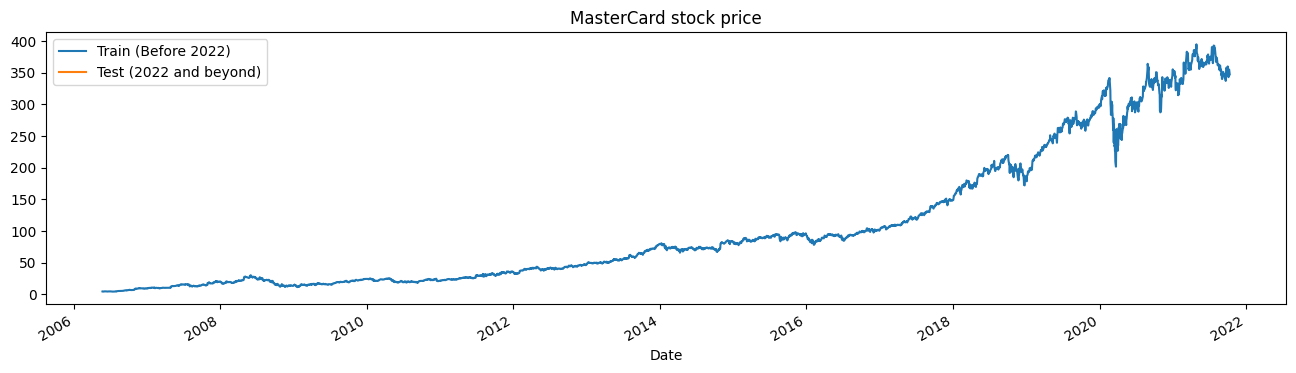

In [8]:
start = 2006
end = 2021

def train_test_plot(dataset, start, end):
    dataset.loc[f"{start}":f"{end}", "Close"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{end+1}":, "Close"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {end+1})", f"Test ({end+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset,start,end)

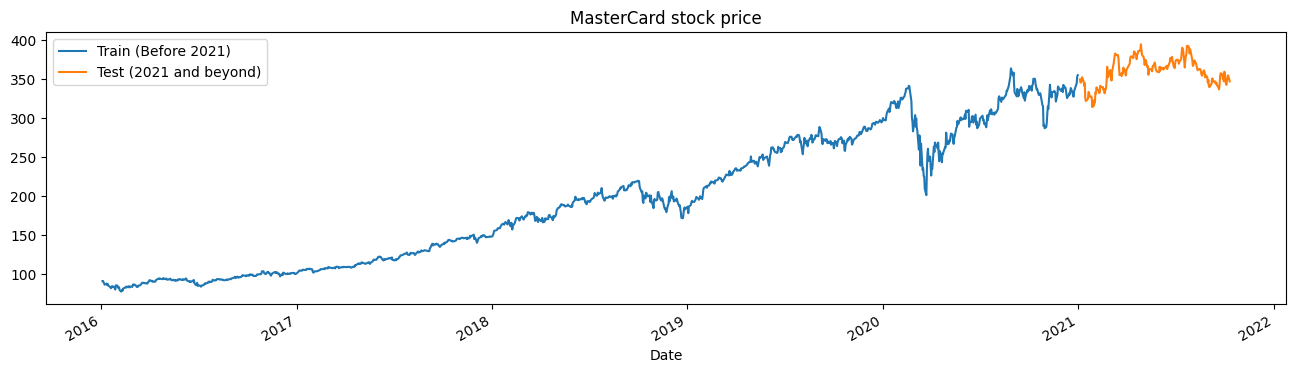

In [9]:
tstart = 2016
tend = 2020

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "Close"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "Close"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)

In [10]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "Close"].values
    test = dataset.loc[f"{tend+1}":, "Close"].values
    return train, test
training_set, test_set = train_test_split(dataset, tstart, tend)

In [11]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

#### Sequencing the Data

To accurately predict the model, a sequence of data is used, determined by the number steps. For example, [1,2,3], would predict 4. The variable 'n_steps' represents this. This value can be modified to alter the number of previous days used to predict the folowing day.

In [12]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)

### Benchmark Run

In [72]:
# The LSTM architecture
model = Sequential()
model.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model.add(Dense(units=1))
# Compiling the model
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 125)               63500     
                                                                 
 dense_21 (Dense)            (None, 1)                 126       
                                                                 
Total params: 63,626
Trainable params: 63,626
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2022-12-11 12:40:57.193340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:40:57.282582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/38 [..............................] - ETA: 38s - loss: 0.1934

2022-12-11 12:40:57.412185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 2s 25ms/step - loss: 0.0143
Epoch 2/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0021
Epoch 3/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0023
Epoch 4/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 5/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0015
Epoch 6/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 7/50
38/38 [==============================] - 1s 16ms/step - loss: 0.0012
Epoch 8/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 9/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0010
Epoch 10/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 11/50
38/38 [==============================] - 1s 17ms/step - loss: 8.6979e-04
Epoch 12/50
38/38 [==============================] - 1s 16ms/step - loss: 7.7665e-04
Epoch 13/50
38/38 [=====================

In [74]:
dataset_total = dataset.loc[:,"Close"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/7 [===>..........................] - ETA: 3s

2022-12-11 12:41:29.789143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:41:29.810804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 17ms/step


In [18]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="purple", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()

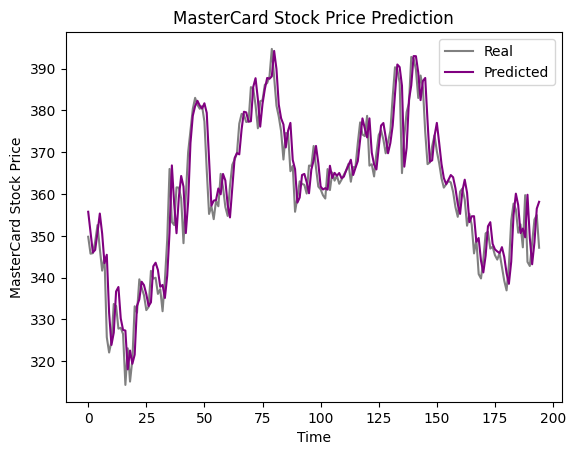

In [76]:
plot_predictions(test_set,predicted_stock_price)

### Adding a Dense Layer and Dropout

In [77]:
# The LSTM architecture
model = Sequential()
model.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model.add(Dense(64))
model.add(Dropout(.2))
model.add(Dense(units=1))
# Compiling the model
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 125)               63500     
                                                                 
 dense_22 (Dense)            (None, 64)                8064      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 71,629
Trainable params: 71,629
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2022-12-11 12:41:30.837182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:41:30.925573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/38 [..............................] - ETA: 37s - loss: 0.2279

2022-12-11 12:41:31.066464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 2s 26ms/step - loss: 0.0153
Epoch 2/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0040
Epoch 3/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0032
Epoch 4/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0026
Epoch 5/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0019
Epoch 6/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 7/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0019
Epoch 8/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 9/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0016
Epoch 10/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0015
Epoch 11/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 12/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0010
Epoch 13/50
38/38 [=============================

In [79]:
dataset_total = dataset.loc[:,"Close"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/7 [===>..........................] - ETA: 1s

2022-12-11 12:42:04.723610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:42:04.745683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 18ms/step


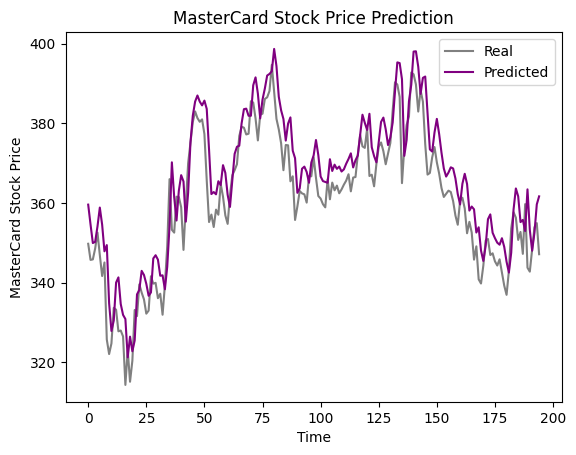

In [80]:
plot_predictions(test_set,predicted_stock_price)

###  Adding 3 More Dense Layers

In [81]:
# The LSTM architecture
model = Sequential()
model.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(units=1))
# Compiling the model
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 125)               63500     
                                                                 
 dense_24 (Dense)            (None, 128)               16128     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 89,997
Trainable params: 89,997
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2022-12-11 12:42:05.824217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:42:05.933693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:42:06.087289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 2s 29ms/step - loss: 0.0160
Epoch 2/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0049
Epoch 3/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0042
Epoch 4/50
38/38 [==============================] - 1s 19ms/step - loss: 0.0033
Epoch 5/50
38/38 [==============================] - 1s 19ms/step - loss: 0.0027
Epoch 6/50
38/38 [==============================] - 1s 19ms/step - loss: 0.0030
Epoch 7/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 8/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0020
Epoch 9/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 10/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0020
Epoch 11/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 12/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0014
Epoch 13/50
38/38 [=============================

In [83]:
dataset_total = dataset.loc[:,"Close"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/7 [===>..........................] - ETA: 1s

2022-12-11 12:42:41.543800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:42:41.567175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 19ms/step


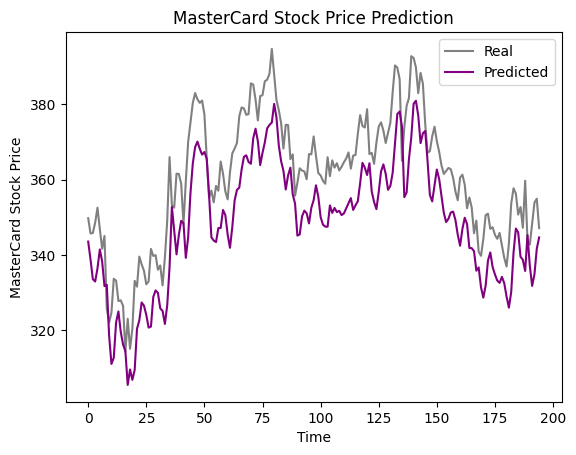

In [84]:
plot_predictions(test_set,predicted_stock_price)

Of these three various neural architectures with n_steps = 60, the original benchmark outperformed the orther created architectures. The graph for the benchmark most closely fitted the line graph of the original data. 

### Original Architecture with n_steps = 30

In [13]:
n_steps = 30
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [86]:
# The LSTM architecture
model = Sequential()
model.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model.add(Dense(units=1))
# Compiling the model
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 125)               63500     
                                                                 
 dense_28 (Dense)            (None, 1)                 126       
                                                                 
Total params: 63,626
Trainable params: 63,626
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2022-12-11 12:42:42.840714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:42:42.907954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:42:42.999837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 2s 17ms/step - loss: 0.0203
Epoch 2/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 3/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 4/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 5/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 6/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 7/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 8/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 9/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 10/50
39/39 [==============================] - 0s 10ms/step - loss: 9.4496e-04
Epoch 11/50
39/39 [==============================] - 0s 10ms/step - loss: 7.7172e-04
Epoch 12/50
39/39 [==============================] - 0s 10ms/step - loss: 9.0814e-04
Epoch 13/50
39/39 [=================

In [88]:
dataset_total = dataset.loc[:,"Close"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 0s 10ms/step


2022-12-11 12:43:03.929377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:43:03.950897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


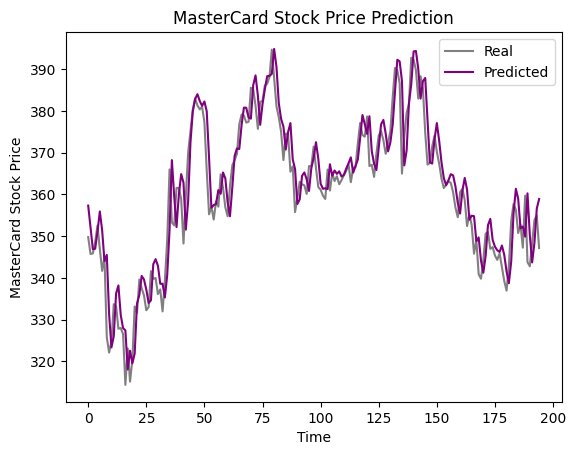

In [89]:
plot_predictions(test_set,predicted_stock_price)

### Adding a Dense Layer and Dropout with n_steps = 30

In [90]:
# The LSTM architecture
model = Sequential()
model.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model.add(Dense(64))
model.add(Dropout(.2))
model.add(Dense(units=1))
# Compiling the model
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 125)               63500     
                                                                 
 dense_29 (Dense)            (None, 64)                8064      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 1)                 65        
                                                                 
Total params: 71,629
Trainable params: 71,629
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2022-12-11 12:43:04.903564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:43:04.993269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/39 [..............................] - ETA: 35s - loss: 0.2565

2022-12-11 12:43:05.109040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 2s 19ms/step - loss: 0.0147
Epoch 2/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0038
Epoch 3/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 4/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0025
Epoch 5/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 6/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 7/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0019
Epoch 8/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 9/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 10/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 11/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 12/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 13/50
39/39 [=============================

In [92]:
dataset_total = dataset.loc[:,"Close"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 0s 11ms/step


2022-12-11 12:43:28.583862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:43:28.606373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


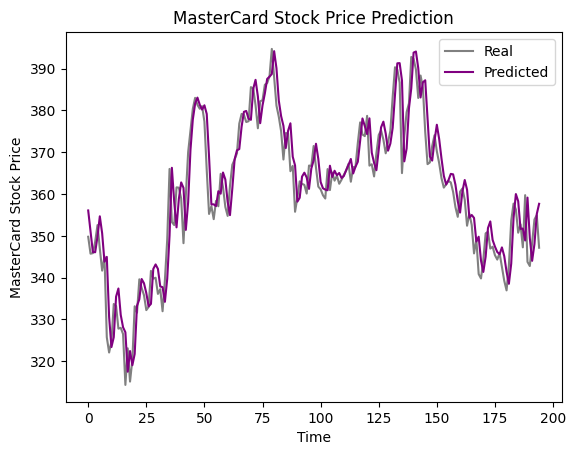

In [93]:
plot_predictions(test_set,predicted_stock_price)

### Adding 3 More Dense Layers with n_steps = 30 ----- Best Run

In [14]:
# The LSTM architecture
model = Sequential()
model.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(units=1))
# Compiling the model
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

Metal device set to: Apple M2


2022-12-13 20:52:02.725829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 20:52:02.726416: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 125)               63500     
                                                                 
 dense (Dense)               (None, 128)               16128     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 89,997
Trainable params: 89,997
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2022-12-13 20:52:05.753939: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-13 20:52:07.069986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-13 20:52:07.288102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-13 20:52:08.575126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 6s 53ms/step - loss: 0.0155
Epoch 2/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0061
Epoch 3/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0042
Epoch 4/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0031
Epoch 5/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0029
Epoch 6/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0030
Epoch 7/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 8/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0020
Epoch 9/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 10/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0020
Epoch 11/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 12/50
39/39 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 13/50
39/39 [=============================

In [19]:
dataset_total = dataset.loc[:,"Close"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 0s 10ms/step


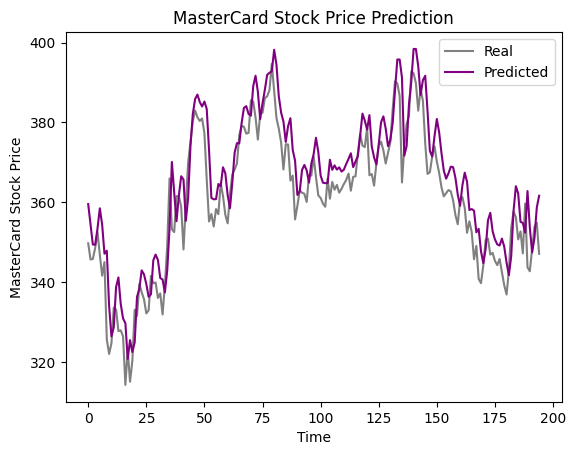

In [21]:
plot_predictions(test_set,predicted_stock_price)

When decreasing n_steps from 60 to 30, it was assumed that the predicted values would stray farther from the real values. This did indeed hold true for the orignal architecture and when adding a dense layer and dropout, but when 3 more dropout layers were added, the model actually fit more closely than the original benchmark. Thus, becoming the best model to fit this MasterCard stock data.

###  Original Architecture with n_steps = 90

In [98]:
n_steps = 90
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [99]:
# The LSTM architecture
model = Sequential()
model.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model.add(Dense(units=1))
# Compiling the model
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 125)               63500     
                                                                 
 dense_35 (Dense)            (None, 1)                 126       
                                                                 
Total params: 63,626
Trainable params: 63,626
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2022-12-11 12:43:57.176012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:43:57.259402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:43:57.403351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 2s 34ms/step - loss: 0.0181
Epoch 2/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0040
Epoch 3/50
37/37 [==============================] - 1s 19ms/step - loss: 0.0030
Epoch 4/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0022
Epoch 5/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0015
Epoch 6/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0016
Epoch 7/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0013
Epoch 8/50
37/37 [==============================] - 1s 19ms/step - loss: 0.0010
Epoch 9/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0013
Epoch 10/50
37/37 [==============================] - 1s 20ms/step - loss: 9.5413e-04
Epoch 11/50
37/37 [==============================] - 1s 20ms/step - loss: 9.8845e-04
Epoch 12/50
37/37 [==============================] - 1s 19ms/step - loss: 9.0001e-04
Epoch 13/50
37/37 [=================

In [101]:
dataset_total = dataset.loc[:,"Close"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

5/7 [====================>.........] - ETA: 0s

2022-12-11 12:44:35.342288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:44:35.363776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 27ms/step


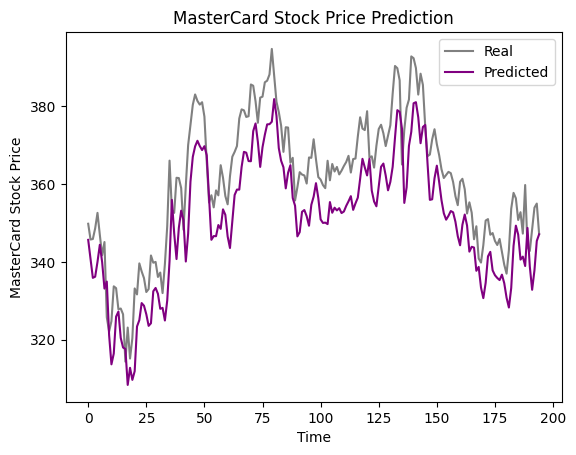

In [102]:
plot_predictions(test_set,predicted_stock_price)

### Adding a Dense Layer and Dropout with n_steps = 90

In [103]:
# The LSTM architecture
model = Sequential()
model.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model.add(Dense(64))
model.add(Dropout(.2))
model.add(Dense(units=1))
# Compiling the model
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 125)               63500     
                                                                 
 dense_36 (Dense)            (None, 64)                8064      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 65        
                                                                 
Total params: 71,629
Trainable params: 71,629
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2022-12-11 12:44:36.472406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:44:36.549427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:44:36.771457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 3s 37ms/step - loss: 0.0160
Epoch 2/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0040
Epoch 3/50
37/37 [==============================] - 1s 22ms/step - loss: 0.0035
Epoch 4/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0028
Epoch 5/50
37/37 [==============================] - 1s 22ms/step - loss: 0.0023
Epoch 6/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0023
Epoch 7/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0019
Epoch 8/50
37/37 [==============================] - 1s 22ms/step - loss: 0.0018
Epoch 9/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0016
Epoch 10/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0015
Epoch 11/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0014
Epoch 12/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0013
Epoch 13/50
37/37 [=============================

In [105]:
dataset_total = dataset.loc[:,"Close"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/7 [===>..........................] - ETA: 1s

2022-12-11 12:45:17.470341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:45:17.492939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 27ms/step


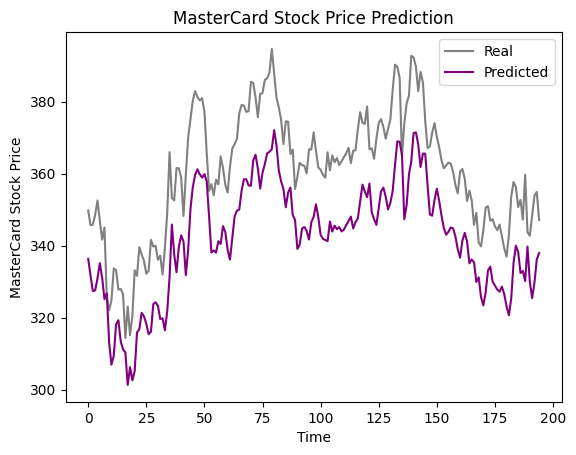

In [106]:
plot_predictions(test_set,predicted_stock_price)

### Adding 3 More Dense Layers with n_steps = 90

In [107]:
# The LSTM architecture
model = Sequential()
model.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(units=1))
# Compiling the model
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 125)               63500     
                                                                 
 dense_38 (Dense)            (None, 128)               16128     
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 89,997
Trainable params: 89,997
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2022-12-11 12:45:18.665425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:45:18.784803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:45:18.985708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 3s 44ms/step - loss: 0.0171
Epoch 2/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0047
Epoch 3/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0050
Epoch 4/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0037
Epoch 5/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0027
Epoch 6/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0028
Epoch 7/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0027
Epoch 8/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0025
Epoch 9/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0021
Epoch 10/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0020
Epoch 11/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0020
Epoch 12/50
37/37 [==============================] - 1s 24ms/step - loss: 0.0021
Epoch 13/50
37/37 [=============================

In [109]:
dataset_total = dataset.loc[:,"Close"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/7 [===>..........................] - ETA: 1s

2022-12-11 12:46:04.411732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 12:46:04.437078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 32ms/step


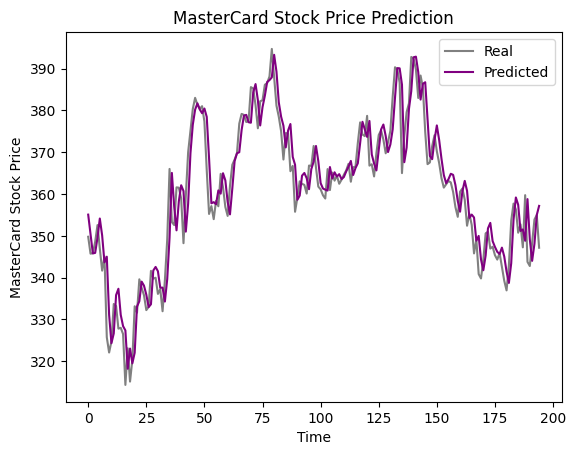

In [110]:
plot_predictions(test_set,predicted_stock_price)

None of models with using n_steps = 90 came close to the accuracies of some of the previous models. The large n_steps could have introduced the potential overfitting.

## Conclusion

The dataset chosen was MasterCard stock data that spanned from May 2006 to October 2021. This dataset included 8 unique attributes:
- the date
- the open value
- the high value
- the low value
- the close value
- the volume of trades
- the dividends paid
- the amount of stock splits

However, for preprocessing the data, the final two attributes were dropped from the dataset because they were deemed unecessary  in predicting the close value (the target variable).

The close value of the MasterCard stock each day will be predicted based on the open value, the high value, the low value, and the volume of trades.

The train and test/validation datasets were separated by time so that the model is predicting in chronological order. The datasets were also sequenced so a group of previous values would be used to predict the next singular value.

There was a total of 9 total runs: 3 various neural architectures x 3 n_steps values.

The best model used the original architecture from the benchmark (Run 6) (LSTM with 125 nodes using the hyperbolic tangent activation function followed by a single fully-connected layer with a singular neuron. It also utilized the RMSprop optimizer and used mean squared error for the loss function). However, deviating from the benchmark run, it used n_steps = 30, meaning that days 1-30 would predict day 31, days 2-31 would predict day 32, days 3-32 would predict day 33, etc. This could have increased the fitting of the data because the smaller n_steps value would increse the number of predictions and since the model is predicting off a smaller number of previous days, it mighht reduce the ambiguity of the numerical relationships.

## References

Fischer, Thomas, and Christopher Krauss, "Deep learning with long short-term memory networks for financial market predictions",
European Journal of Operational Research, Volume 270, Issue 2, 2018, Pages 654-669, ISSN 0377-2217,https://doi.org/10.1016/j.ejor.2017.11.054.

Jain, Lakhmi C., and Larry Medsker. Recurrent Neural Networks: Design and Applications. CRC Press, 2000. 

Shen, J., Shafiq, M.O. Short-term stock market price trend prediction using a comprehensive deep learning system. J Big Data 7, 66 (2020). https://doi.org/10.1186/s40537-020-00333-6
 
Tretina, Kat. “What Is the Stock Market? How Does It Work?” Forbes, Forbes Magazine, 5 Oct. 2022, www.forbes.com/advisor/investing/what-is-the-stock-market/. 

Vonko, Dima. “Neural Networks: Forecasting Profits.” Investopedia, Investopedia, 8 July 2022, www.investopedia.com/articles/trading/06/neuralnetworks.asp#:~:text=Neural%20networks%20do%20not%20make,using%20traditional%20technical%20analysis%20methods.

https://github.com/rtwhite1546/Fall-2022-Neural-Networks